In [1]:
from iSDM.species import GBIFSpecies

In [2]:
my_species = GBIFSpecies(name_species="Etheostoma_blennioides")

In [3]:
my_data = my_species.load_data("Etheostoma_blennioides2382397.pkl") # this is a reduced dataset

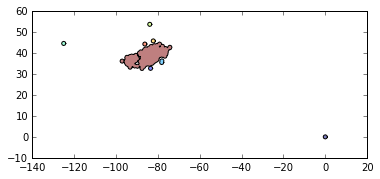

In [4]:
%matplotlib inline

my_species.polygonize().plot() # crashes if NaN coordinates. osgeo's fault; fixed to ignore them

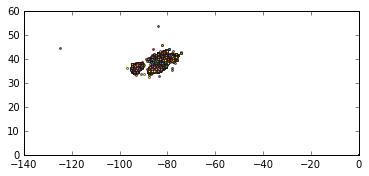

In [5]:
my_species.data_full.geometry.plot()

In [42]:
from shapely.geometry import Point, Polygon
# cut the outliers, i.e., overlay with a polygon
my_species.data_full = my_species.data_full[my_species.data_full.geometry.within(Polygon(((-100,30), (-100, 50), (-70, 50),(-70, 30))))]

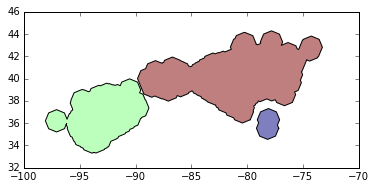

In [43]:
my_species.polygonize().plot()

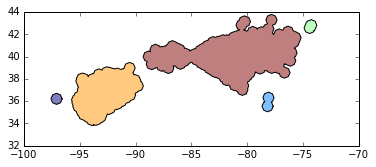

In [44]:
my_species.polygonize(buffer=0.5, simplify_tolerance=0.05).plot()

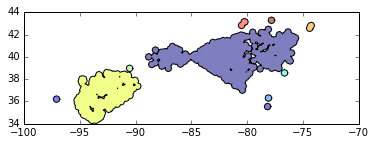

In [45]:
my_species.polygonize(buffer=0.3, simplify_tolerance=0.03).plot()  # etc

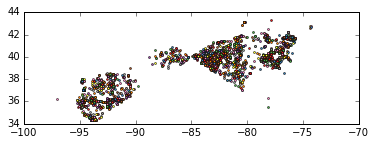

In [41]:
filtered_data = my_species.data_full.geometry[my_species.data_full.geometry.within(Polygon(((-100,30), (-100, 50), (-70, 50),(-70, 30))))]
filtered_data.plot()

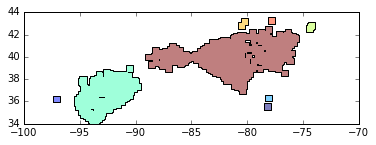

In [11]:
my_species.polygonize(buffer=0.3, simplify_tolerance=0.03, with_envelope=True).plot() # with_envelope means pixelized

In [63]:
type(filtered_data)

geopandas.geoseries.GeoSeries

In [66]:
my_species.data_full.shape

(5226, 138)

In [67]:
filtered_data.shape

(3333,)

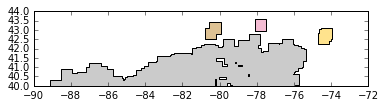

In [56]:
# cut even more
my_species.polygonize(buffer=0.3, simplify_tolerance=0.03, with_envelope=True).geometry.intersection(Polygon(((-90,40), (-90, 50), (-70, 50),(-70, 40)))).plot()

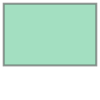

In [48]:
Polygon(((-100,30), (-100, 50), (-70, 50),(-70, 30)))

In [57]:
my_species.polygonize(buffer=0.3, simplify_tolerance=0.03, with_envelope=True).geometry.intersection(Polygon(((-90,40), (-90, 50), (-70, 50),(-70, 40))))

0                                                   ()
1                                                   ()
2                                                   ()
3                                                   ()
4    POLYGON ((-74.10083 42.39859000000001, -74.100...
5    POLYGON ((-80.2 42.51667, -80.8 42.51667, -80....
6    POLYGON ((-78.12052 42.97298, -78.12052 43.572...
7    POLYGON ((-89.12281999999999 40, -89.122819999...
dtype: object

In [108]:
from geopandas import GeoDataFrame

In [109]:
from shapely.geometry import Point

In [121]:
crs = None # converting GBIF pointrecords to geopandas; maybe a good idea to have it unified
geometry = [Point(xy) for xy in zip(my_data['decimallongitude'], my_data['decimallatitude'])]

In [122]:
geo_df = GeoDataFrame(my_data, crs=crs, geometry=geometry)

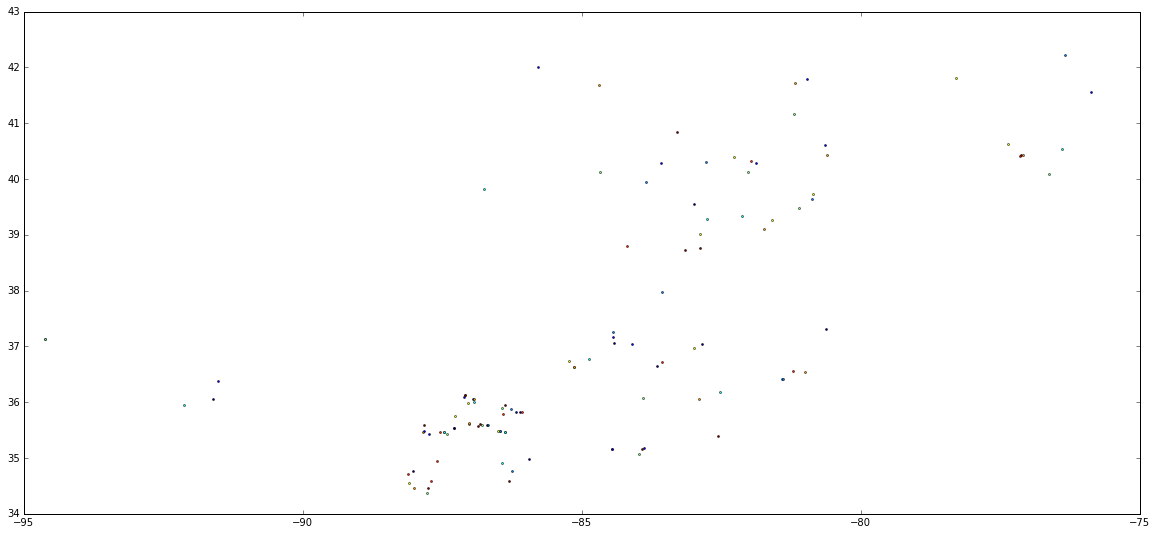

In [112]:
%matplotlib inline
geo_df.plot(figsize=(20, 25))

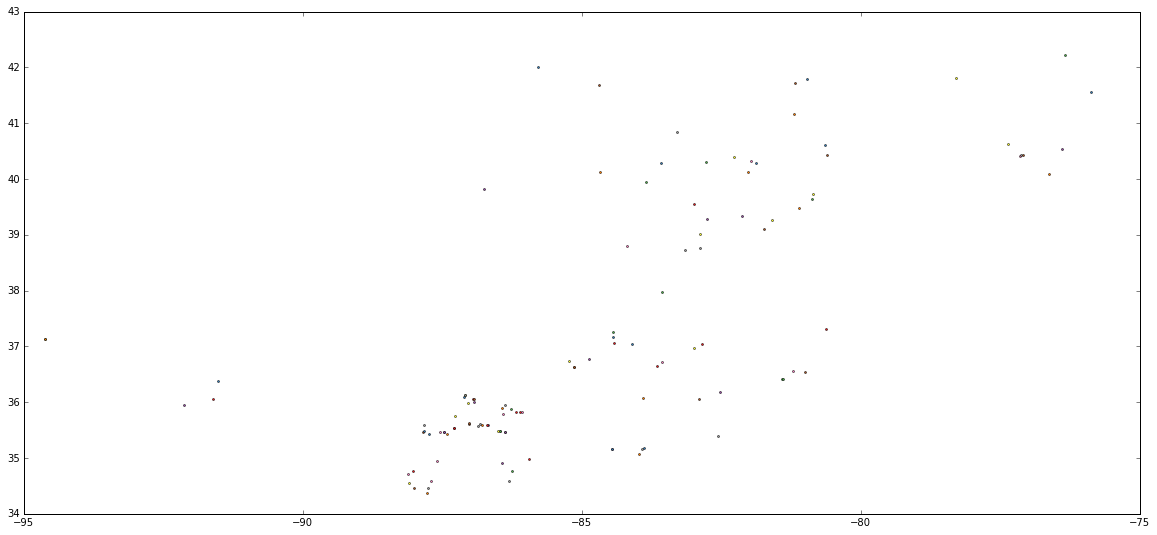

In [113]:
geo_df.centroid.plot(figsize=(20,25)) # nope, still points

In [123]:
my_data

,decimallatitude,decimallongitude,rightsholder,datasetname,geometry
1,35.53250,-87.29580,Yale Peabody Museum of Natural History,NaN,POINT (-87.2958 35.5325)
2,41.79664,-80.97289,Robert L Curtis,iNaturalist research-grade observations,POINT (-80.97289000000001 41.79664)
3,37.97240,-83.56716,Brian Wulker,iNaturalist research-grade observations,POINT (-83.56716 37.9724)
4,36.77431,-84.88030,Yale Peabody Museum of Natural History,NaN,POINT (-84.88030000000001 36.77431)
5,36.63478,-85.14578,Yale Peabody Museum of Natural History,NaN,POINT (-85.14578 36.63478)
6,36.73364,-85.22733,Yale Peabody Museum of Natural History,NaN,POINT (-85.22732999999999 36.73364)
7,36.63478,-85.14578,Yale Peabody Museum of Natural History,NaN,POINT (-85.14578 36.63478)
8,34.58414,-87.70333,Yale Peabody Museum of Natural History,NaN,POINT (-87.70332999999999 34.58414)
9,35.39114,-82.56875,Yale Peabody Museum of Natural History,NaN,POINT (-82.56874999999999 35.39114)
10,35.53244,-87.29580,Yale Peabody Museum of Natural History,NaN,POINT (-87.2958 35.53244)


In [126]:
geo_df

,decimallatitude,decimallongitude,rightsholder,datasetname,geometry
1,35.53250,-87.29580,Yale Peabody Museum of Natural History,NaN,POINT (-87.2958 35.5325)
2,41.79664,-80.97289,Robert L Curtis,iNaturalist research-grade observations,POINT (-80.97289000000001 41.79664)
3,37.97240,-83.56716,Brian Wulker,iNaturalist research-grade observations,POINT (-83.56716 37.9724)
4,36.77431,-84.88030,Yale Peabody Museum of Natural History,NaN,POINT (-84.88030000000001 36.77431)
5,36.63478,-85.14578,Yale Peabody Museum of Natural History,NaN,POINT (-85.14578 36.63478)
6,36.73364,-85.22733,Yale Peabody Museum of Natural History,NaN,POINT (-85.22732999999999 36.73364)
7,36.63478,-85.14578,Yale Peabody Museum of Natural History,NaN,POINT (-85.14578 36.63478)
8,34.58414,-87.70333,Yale Peabody Museum of Natural History,NaN,POINT (-87.70332999999999 34.58414)
9,35.39114,-82.56875,Yale Peabody Museum of Natural History,NaN,POINT (-82.56874999999999 35.39114)
10,35.53244,-87.29580,Yale Peabody Museum of Natural History,NaN,POINT (-87.2958 35.53244)


In [127]:
type(my_data)

pandas.core.frame.DataFrame

In [128]:
my_data['decimallatitude'].head()

1    35.53250
2    41.79664
3    37.97240
4    36.77431
5    36.63478
Name: decimallatitude, dtype: float64

In [129]:
my_data.head() # notice now the geometry column is there, automatically appended

,decimallatitude,decimallongitude,rightsholder,datasetname,geometry
1,35.53250,-87.29580,Yale Peabody Museum of Natural History,NaN,POINT (-87.2958 35.5325)
2,41.79664,-80.97289,Robert L Curtis,iNaturalist research-grade observations,POINT (-80.97289000000001 41.79664)
3,37.97240,-83.56716,Brian Wulker,iNaturalist research-grade observations,POINT (-83.56716 37.9724)
4,36.77431,-84.88030,Yale Peabody Museum of Natural History,NaN,POINT (-84.88030000000001 36.77431)
5,36.63478,-85.14578,Yale Peabody Museum of Natural History,NaN,POINT (-85.14578 36.63478)


In [79]:
type(my_data)

pandas.core.frame.DataFrame

In [130]:
geo_df.shape

(119, 5)

In [131]:
my_data.shape

(119, 5)

In [132]:
my_data.shape == geo_df.shape # hmmm

True

In [133]:
geo_df.geometry # geometry in GBIF data is POINT of course, geometry column in IUCN is polygon.
# but can't we make a polygon out of points? Like the outer boundary or something?

1                 POINT (-87.2958 35.5325)
2      POINT (-80.97289000000001 41.79664)
3                POINT (-83.56716 37.9724)
4      POINT (-84.88030000000001 36.77431)
5               POINT (-85.14578 36.63478)
6      POINT (-85.22732999999999 36.73364)
7               POINT (-85.14578 36.63478)
8      POINT (-87.70332999999999 34.58414)
9      POINT (-82.56874999999999 35.39114)
10               POINT (-87.2958 35.53244)
11      POINT (-83.8878 35.17769999911117)
12      POINT (-82.78440000000001 40.3032)
13                POINT (-82.1228 39.3295)
14      POINT (-83.9743 35.07779999911228)
15     POINT (-82.98860000000001 36.97886)
16      POINT (-81.73990000000001 39.1112)
17     POINT (-83.55835999999999 36.72267)
18      POINT (-83.92019999999999 35.1603)
19     POINT (-83.65600000000001 36.64956)
20               POINT (-84.10619 37.0358)
21     POINT (-76.33848999999999 42.22403)
22      POINT (-82.75069999999999 39.2823)
23                POINT (-81.1114 39.4714)
24         

In [134]:
geo_df.geometry.area # right, this is why it won't work, its a series of points, not polygons.

1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
      ... 
91     0.0
92     0.0
93     0.0
94     0.0
95     0.0
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
101    0.0
102    0.0
103    0.0
104    0.0
105    0.0
106    0.0
107    0.0
108    0.0
109    0.0
110    0.0
111    0.0
112    0.0
113    0.0
114    0.0
115    0.0
116    0.0
117    0.0
118    0.0
119    0.0
120    0.0
dtype: float64

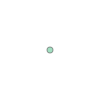

In [135]:
geo_df.geometry[1]

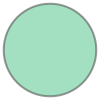

In [136]:
my_data.geometry[1].buffer(2) #yay

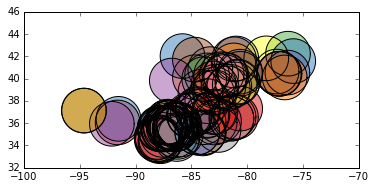

In [137]:
geo_df.geometry.buffer(2).plot()

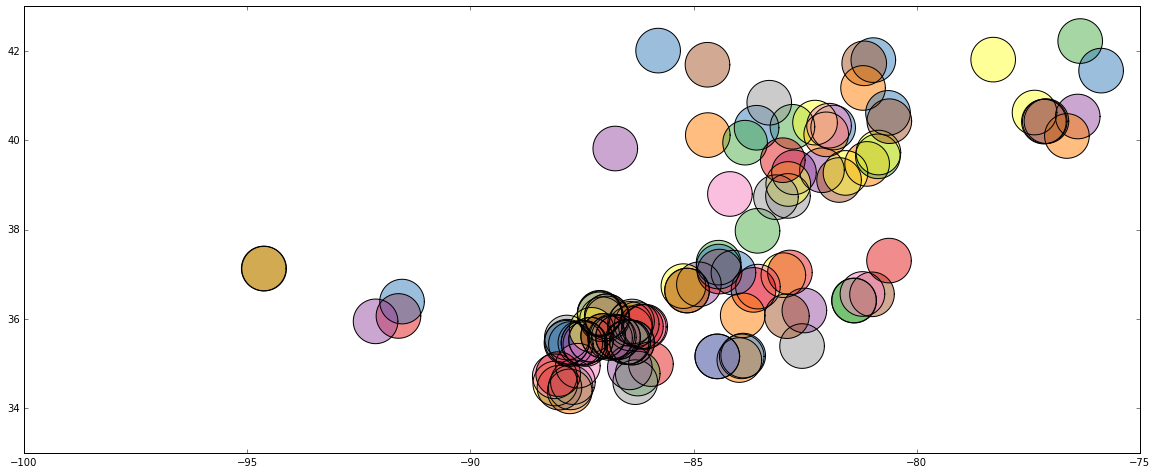

In [138]:
geo_df.buffer(0.5).plot(figsize=(20,25)) # a buffer around each point record; we could draw pseudo-absences from there

In [139]:
type(geo_df.geometry[1])

shapely.geometry.point.Point

In [140]:
from iSDM.species import IUCNSpecies
turtles = IUCNSpecies(name_species="Acanthochelys_pallidipectoris")

In [141]:
turtles_df = turtles.load_data("/home/daniela/git/iSDM/notebooks/Acanthochelys pallidipectoris75.pkl")

In [142]:
turtles_df

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_Area,shape_Leng,source,species_na,subpop,subspecies,tax_comm,year
138,Acanthochelys pallidipectoris,VU,CRF,REPTILIA,Rhodin,None,CHELIDAE,Acanthochelys,POLYGON ((-59.20001220703125 -28.0374755859375...,75.0,...,1.0,1.0,36.632836,54.770042,CBFTT,pallidipectoris,None,None,None,2013.0


In [143]:
turtles_df.geometry

138    POLYGON ((-59.20001220703125 -28.0374755859375...
Name: geometry, dtype: object

In [144]:
type(turtles_df.geometry)

geopandas.geoseries.GeoSeries

In [145]:
type(geo_df.geometry)

geopandas.geoseries.GeoSeries

In [146]:
turtles_df.geometry.bounds

,minx,miny,maxx,maxy
138,-65.141846,-30.608276,-57.536926,-21.49585


In [147]:
turtles_df.geometry.length

138    54.772857
dtype: float64

In [148]:
geo_df.geometry.bounds.head() # bounds == points, nothing changes. but at least useful to get individual x y coords

,minx,miny,maxx,maxy
1,-87.29580,35.53250,-87.29580,35.53250
2,-80.97289,41.79664,-80.97289,41.79664
3,-83.56716,37.97240,-83.56716,37.97240
4,-84.88030,36.77431,-84.88030,36.77431
5,-85.14578,36.63478,-85.14578,36.63478


In [150]:
turtles_df.representative_point() # could be useful for sampling?

138    POINT (-61.16457330175193 -26.05206298828125)
dtype: object

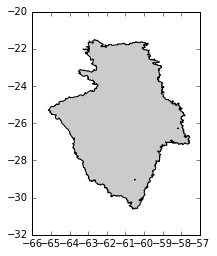

In [151]:
turtles_df.geometry.plot()

In [152]:
geo_df.geometry.representative_point().head()

1               POINT (-87.2958 35.5325)
2    POINT (-80.97289000000001 41.79664)
3              POINT (-83.56716 37.9724)
4    POINT (-84.88030000000001 36.77431)
5             POINT (-85.14578 36.63478)
dtype: object

In [153]:
geo_df.geometry.head() # representative point of a point, well, still.

1               POINT (-87.2958 35.5325)
2    POINT (-80.97289000000001 41.79664)
3              POINT (-83.56716 37.9724)
4    POINT (-84.88030000000001 36.77431)
5             POINT (-85.14578 36.63478)
Name: geometry, dtype: object

In [154]:
turtles_df.geometry.is_valid

Ring Self-intersection at or near point -59.20001220703125 -28.0374755859375


138    False
dtype: bool

In [155]:
turtles_df.contains(Point(-61,-26))

138    True
dtype: bool

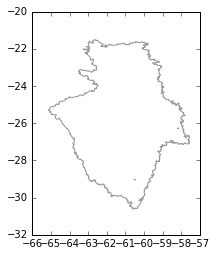

In [156]:
turtles_df.geometry.boundary.plot()

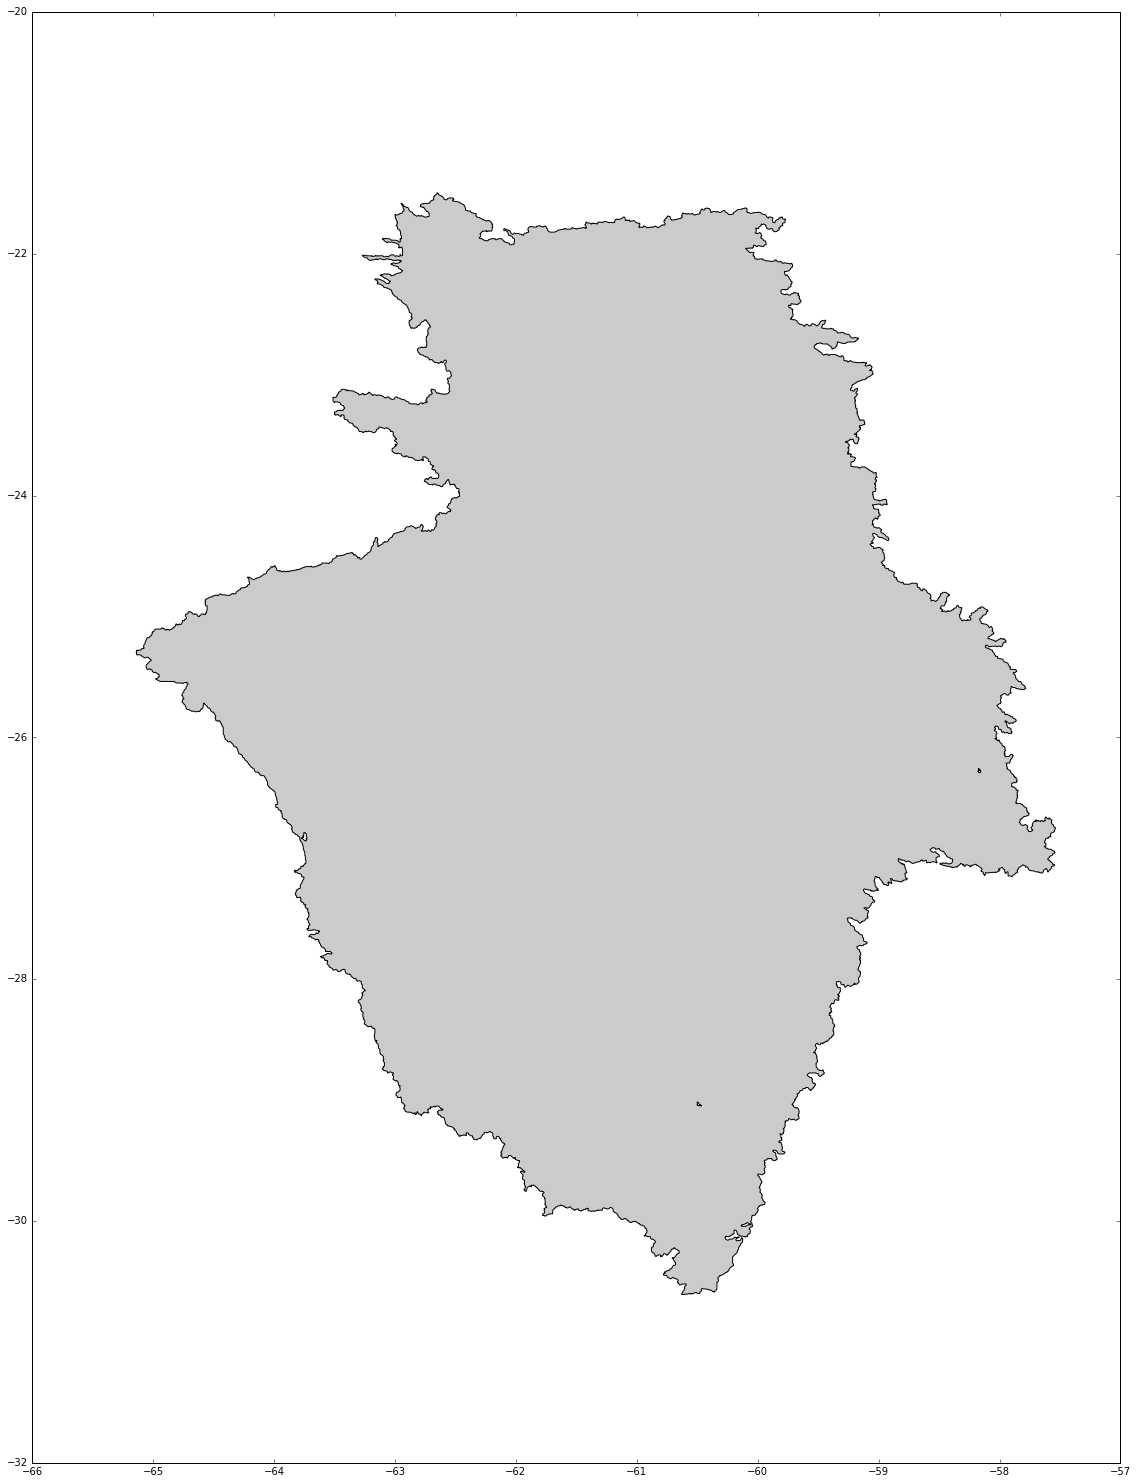

In [157]:
turtles_df.difference(Point(-61, -26)).plot(figsize=(24,26))

Ring Self-intersection at or near point -59.20001220703125 -28.0374755859375


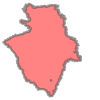

In [158]:
turtles_df.iat[0,8]

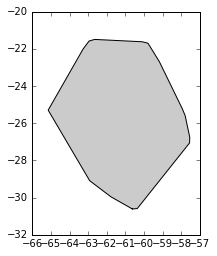

In [159]:
turtles_df.geometry.convex_hull.plot()

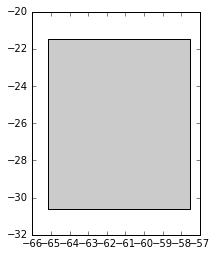

In [160]:
turtles_df.geometry.envelope.plot()

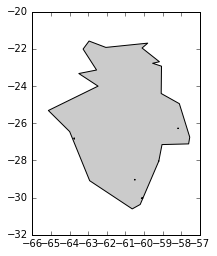

In [161]:
turtles_df.simplify(tolerance=0.3).plot() # nice!

In [162]:
turtles_df.crs # !!!! <-- get the coordinate reference system.

{'init': 'epsg:4326'}

In [164]:
shapely_point = geo_df.geometry[1]
shapely_point.xy

(array('d', [-87.2958]), array('d', [35.5325]))

In [165]:
shapely_point.buffer(2).area

12.546193962183764

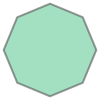

In [166]:
# ONE WAY OF CREATING A POLYGON
shapely_buffer = shapely_point.buffer(2.0)
shapely_buffer.simplify(0.2, preserve_topology=False)


In [167]:
type(shapely_buffer) # already a polygon

shapely.geometry.polygon.Polygon

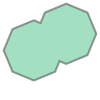

In [170]:
# merge with another point
shapely_buffer.simplify(0.2, preserve_topology=True).union( geo_df.geometry[5].buffer(2).simplify(0.2, preserve_topology=False))

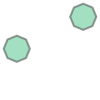

In [171]:
# merge with another point
another_polygon = shapely_buffer.simplify(0.2, preserve_topology=False).union( geo_df.geometry[10].buffer(2).simplify(0.2, preserve_topology=False))
another_polygon.union( geo_df.geometry[100].buffer(2).simplify(0.2, preserve_topology=True))

In [172]:
shapely_buffer.exterior.coords.xy

(array('d', [-85.2958, -85.3054305466556, -85.33422943919354, -85.38191932853559, -85.44804093497743, -85.53195747130329, -85.6328607753949, -85.74977909327453, -85.88158643762691, -86.02701343167271, -86.1846595339608, -86.353006526348, -86.53043313526982, -86.71523064549108, -86.90561935596774, -87.09976571934088, -87.2958, -87.49183428065912, -87.68598064403226, -87.87636935450892, -88.06116686473018, -88.23859347365199, -88.4069404660392, -88.56458656832729, -88.71001356237309, -88.84182090672547, -88.95873922460508, -89.05964252869671, -89.14355906502257, -89.20968067146441, -89.25737056080646, -89.2861694533444, -89.2958, -89.2861694533444, -89.25737056080646, -89.20968067146441, -89.14355906502257, -89.05964252869671, -88.9587392246051, -88.84182090672547, -88.71001356237309, -88.56458656832729, -88.4069404660392, -88.238593473652, -88.06116686473018, -87.87636935450892, -87.68598064403226, -87.49183428065912, -87.2958, -87.09976571934088, -86.90561935596774, -86.71523064549108,

In [173]:
import shapely.ops

In [229]:
third_polygon = geo_df.geometry[30].buffer(1, resolution=160).simplify(0.1, preserve_topology=False)

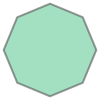

In [230]:
third_polygon

In [191]:
fourth_polygon = geo_df.geometry[50].buffer(2).simplify(0.2, preserve_topology=False)

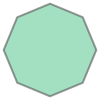

In [192]:
fourth_polygon

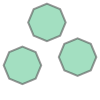

In [193]:
shapely.ops.cascaded_union([another_polygon, third_polygon, fourth_polygon])

In [194]:
type(shapely.ops.cascaded_union([another_polygon, third_polygon]))

shapely.geometry.multipolygon.MultiPolygon

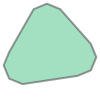

In [195]:
multipolyon = shapely.ops.cascaded_union([another_polygon, third_polygon, fourth_polygon])
multipolyon.convex_hull

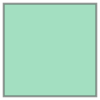

In [196]:
third_polygon.envelope # or we can "pixelize" every point (with a buffer around) like this, and then combine the envelopes 

In [197]:
multipolyon_envelope = shapely.ops.cascaded_union([another_polygon.envelope, third_polygon.envelope, fourth_polygon.envelope])

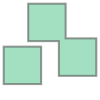

In [200]:
multipolyon_envelope

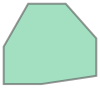

In [201]:
multipolyon_envelope.convex_hull

In [233]:
geo_df.geometry.buffer(1, resolution=160).simplify(0.1, preserve_topology=False)

1      POLYGON ((-86.2958 35.5325, -86.58869321881345...
2      POLYGON ((-79.97289000000001 41.79664, -80.265...
3      POLYGON ((-82.56716 37.9724, -82.8600532188134...
4      POLYGON ((-83.88030000000001 36.77431, -84.173...
5      POLYGON ((-84.14578 36.63478, -84.438673218813...
6      POLYGON ((-84.22732999999999 36.73364, -84.520...
7      POLYGON ((-84.14578 36.63478, -84.438673218813...
8      POLYGON ((-86.70332999999999 34.58414, -86.996...
9      POLYGON ((-81.56874999999999 35.39114, -81.861...
10     POLYGON ((-86.2958 35.53244, -86.5886932188134...
11     POLYGON ((-82.8878 35.17769999911117, -83.1806...
12     POLYGON ((-81.78440000000001 40.3032, -82.0772...
13     POLYGON ((-81.1228 39.3295, -81.41569321881344...
14     POLYGON ((-82.9743 35.07779999911228, -83.2671...
15     POLYGON ((-81.98860000000001 36.97886, -82.281...
16     POLYGON ((-80.73990000000001 39.1112, -81.0327...
17     POLYGON ((-82.55835999999999 36.72267, -82.851...
18     POLYGON ((-82.9201999999

In [262]:
# lets do it for all
multi_polygon = shapely.ops.cascaded_union(geo_df.geometry.buffer(1).simplify(0.1, preserve_topology=False).tolist())

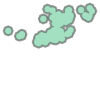

In [263]:
multi_polygon

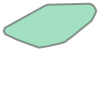

In [264]:
multi_polygon.convex_hull

In [265]:
multi_polygon_with_envelope = shapely.ops.cascaded_union(geo_df.geometry.buffer(1).simplify(0.1, preserve_topology=False).envelope.tolist())

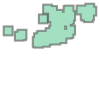

In [266]:
multi_polygon_with_envelope

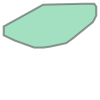

In [267]:
multi_polygon_with_envelope.convex_hull

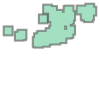

In [268]:
shapely.ops.cascaded_union(geo_df.geometry.buffer(1).envelope.tolist()) # without simplify

In [271]:
no_simplify = shapely.ops.cascaded_union(geo_df.geometry.buffer(1).tolist()) # without simplify

In [272]:
type(no_simplify)

shapely.geometry.multipolygon.MultiPolygon

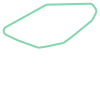

In [281]:
no_simplify.convex_hull.boundary

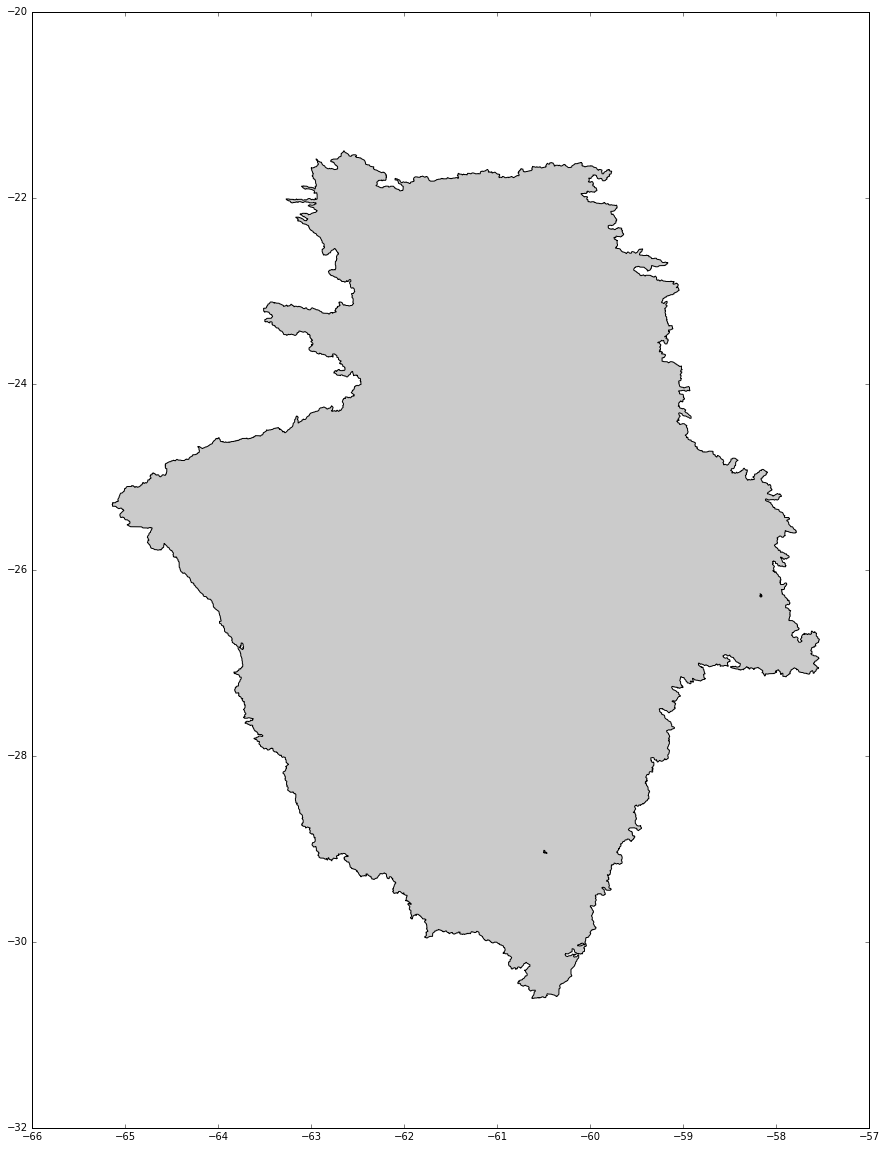

In [283]:
turtles_df.geometry.plot(figsize=(20,20))

In [284]:
type(turtles_df.geometry)

geopandas.geoseries.GeoSeries

In [285]:
type(no_simplify.convex_hull)

shapely.geometry.polygon.Polygon

In [307]:
geo_df_geometry = geo_df.copy(deep=True)

In [440]:
geo_df_geometry = geo_df_geometry.buffer(1).simplify(0.1, preserve_topology=False)

In [308]:
geo_df_geometry['geometry'] = geo_df_geometry['geometry'].apply(lambda x: x.buffer(1).simplify(0.1, preserve_topology=False))

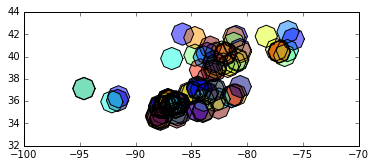

In [309]:
geo_df_geometry.plot()

In [85]:
# expanding each sample point into its polygon of influence (buffer)
geo_df.buffer(1).simplify(0.1, preserve_topology=False).plot() # no need for lambda like above

NameError: name 'geo_df' is not defined

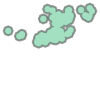

In [325]:
shapely.ops.cascaded_union(geo_df_geometry.geometry.tolist()) # this is a multipolygon

In [326]:
from geopandas import GeoDataFrame, GeoSeries

In [330]:
new_series = GeoSeries(shapely.ops.cascaded_union(geo_df_geometry.geometry.tolist()))

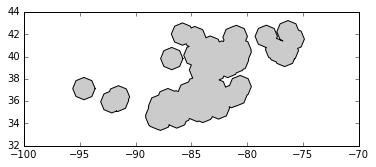

In [331]:
new_series.plot()

In [333]:
new_series # not a multipolygon?

0    (POLYGON ((-93.61963 37.12537, -93.91252321881...
dtype: object

In [337]:
type(shapely.ops.cascaded_union(geo_df_geometry.geometry))

shapely.geometry.multipolygon.MultiPolygon

In [338]:
import pandas as pd

In [342]:
len(shapely.ops.cascaded_union(geo_df_geometry.geometry)) # HMMM, each island is a separate polygon

5

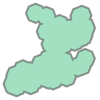

In [347]:
shapely.ops.cascaded_union(geo_df_geometry.geometry)[4]

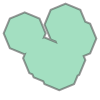

In [348]:
shapely.ops.cascaded_union(geo_df_geometry.geometry)[2]

In [380]:
my_multipolygon = shapely.ops.cascaded_union(geo_df_geometry.geometry)

In [381]:
type(my_multipolygon)

shapely.geometry.multipolygon.MultiPolygon

In [382]:
len(my_multipolygon)

5

In [392]:
again_series = GeoSeries(my_multipolygon)

In [393]:
again_series.shape # all in one polygon??

(1,)

In [409]:
again_df = GeoDataFrame( geometry=[pol for pol in my_multipolygon]) # no .tolist for MultiPolygon unfortunatelly

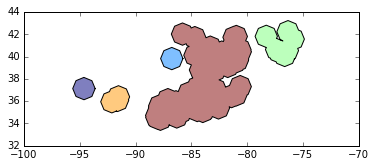

In [410]:
again_df.plot() # YESS THANK YOU. Different islands different polygons

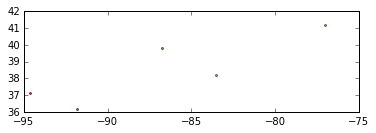

In [434]:
again_df.geometry.representative_point().plot()

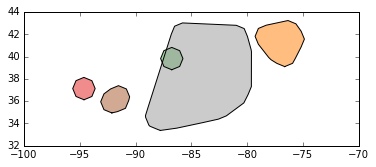

In [435]:
again_df.geometry.convex_hull.plot()

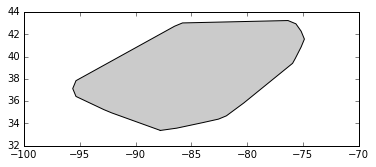

In [437]:
again_series.convex_hull.plot()

In [425]:
geo_df_geometry.geometry

1      POLYGON ((-86.2958 35.5325, -86.58869321881345...
2      POLYGON ((-79.97289000000001 41.79664, -80.265...
3      POLYGON ((-82.56716 37.9724, -82.8600532188134...
4      POLYGON ((-83.88030000000001 36.77431, -84.173...
5      POLYGON ((-84.14578 36.63478, -84.438673218813...
6      POLYGON ((-84.22732999999999 36.73364, -84.520...
7      POLYGON ((-84.14578 36.63478, -84.438673218813...
8      POLYGON ((-86.70332999999999 34.58414, -86.996...
9      POLYGON ((-81.56874999999999 35.39114, -81.861...
10     POLYGON ((-86.2958 35.53244, -86.5886932188134...
11     POLYGON ((-82.8878 35.17769999911117, -83.1806...
12     POLYGON ((-81.78440000000001 40.3032, -82.0772...
13     POLYGON ((-81.1228 39.3295, -81.41569321881344...
14     POLYGON ((-82.9743 35.07779999911228, -83.2671...
15     POLYGON ((-81.98860000000001 36.97886, -82.281...
16     POLYGON ((-80.73990000000001 39.1112, -81.0327...
17     POLYGON ((-82.55835999999999 36.72267, -82.851...
18     POLYGON ((-82.9201999999

In [443]:
geo_df.geometry

1                 POINT (-87.2958 35.5325)
2      POINT (-80.97289000000001 41.79664)
3                POINT (-83.56716 37.9724)
4      POINT (-84.88030000000001 36.77431)
5               POINT (-85.14578 36.63478)
6      POINT (-85.22732999999999 36.73364)
7               POINT (-85.14578 36.63478)
8      POINT (-87.70332999999999 34.58414)
9      POINT (-82.56874999999999 35.39114)
10               POINT (-87.2958 35.53244)
11      POINT (-83.8878 35.17769999911117)
12      POINT (-82.78440000000001 40.3032)
13                POINT (-82.1228 39.3295)
14      POINT (-83.9743 35.07779999911228)
15     POINT (-82.98860000000001 36.97886)
16      POINT (-81.73990000000001 39.1112)
17     POINT (-83.55835999999999 36.72267)
18      POINT (-83.92019999999999 35.1603)
19     POINT (-83.65600000000001 36.64956)
20               POINT (-84.10619 37.0358)
21     POINT (-76.33848999999999 42.22403)
22      POINT (-82.75069999999999 39.2823)
23                POINT (-81.1114 39.4714)
24         

In [444]:
geo_df = geo_df.buffer(1).simplify(0.1, preserve_topology=False)

In [445]:
geo_df.geometry

1      POLYGON ((-86.2958 35.5325, -86.58869321881345...
2      POLYGON ((-79.97289000000001 41.79664, -80.265...
3      POLYGON ((-82.56716 37.9724, -82.8600532188134...
4      POLYGON ((-83.88030000000001 36.77431, -84.173...
5      POLYGON ((-84.14578 36.63478, -84.438673218813...
6      POLYGON ((-84.22732999999999 36.73364, -84.520...
7      POLYGON ((-84.14578 36.63478, -84.438673218813...
8      POLYGON ((-86.70332999999999 34.58414, -86.996...
9      POLYGON ((-81.56874999999999 35.39114, -81.861...
10     POLYGON ((-86.2958 35.53244, -86.5886932188134...
11     POLYGON ((-82.8878 35.17769999911117, -83.1806...
12     POLYGON ((-81.78440000000001 40.3032, -82.0772...
13     POLYGON ((-81.1228 39.3295, -81.41569321881344...
14     POLYGON ((-82.9743 35.07779999911228, -83.2671...
15     POLYGON ((-81.98860000000001 36.97886, -82.281...
16     POLYGON ((-80.73990000000001 39.1112, -81.0327...
17     POLYGON ((-82.55835999999999 36.72267, -82.851...
18     POLYGON ((-82.9201999999

In [64]:
from geopandas import GeoSeries, GeoDataFrame
ajde = GeoDataFrame.from_file("/home/daniela/git/iSDM/data/urban_areas/ne_50m_urban_areas.shp")

IndexError: list index out of range

In [63]:
ajde

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
0,Acanthochelys pallidipectoris,VU,CRF,REPTILIA,Rhodin,None,CHELIDAE,Acanthochelys,POLYGON ((-59.20001220703125 -28.0374755859375...,75.0,...,1.0,1.0,36.632836,54.770042,CBFTT,pallidipectoris,None,None,None,2013.0


In [67]:
from geopandas import GeoDataFrame, GeoSeries

In [68]:
GeoDataFrame.from_file("../data/example.json")

,geometry
0,POINT (-105.01621 39.57422)


In [70]:
from osgeo import gdal
dem_file = gdal.Open("/home/daniela/git/iSDM/data/tmax1/tmax1.bil")

In [73]:
num_bands = dem_file.RasterCount
band = dem_file.GetRasterBand(1)
data = band.ReadAsArray()

In [74]:
data

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ..., 
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

In [75]:
band.GetNoDataValue()

-9999.0

In [76]:
data.shape # degrees * 10, timezones? 8640/360=24

(3600, 8640)

In [81]:
data[data>1].shape

(4634609,)

In [86]:
from geopandas.geoseries import *

In [87]:
from geopandas import GeoDataFrame, GeoSeries

In [88]:
from shapely.geometry import Point, Polygon

In [121]:
p1 = Point(.5,.5)
p2 = Point(.5,1)
p3 = Point(1,1)
p4 = Point(2.1,2.1)
p5 = Point(2,2.5)
p6 = Point(5,5)

In [122]:
points = GeoSeries([p1,p2,p3,p4,p5,p6])

In [127]:
poly = GeoSeries([Polygon([(0,0), (0,2), (2,2), (2,0)]),Polygon([(3,3), (3,6), (6,6), (6,3)])])

In [128]:
points.intersects(poly.unary_union)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

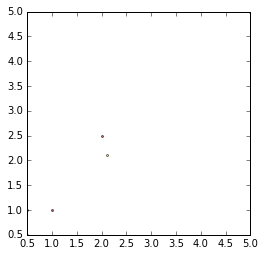

In [129]:
points.plot()

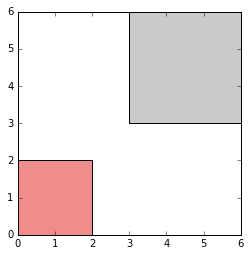

In [130]:
poly.plot()

In [120]:
type(poly)

geopandas.geoseries.GeoSeries

In [12]:
from osgeo import ogr
from osgeo import gdal

geo = gdal.Open("/home/daniela/git/iSDM/data/tmax1/tmax12.bil")

In [13]:
drv= geo.GetDriver()

In [14]:
drv.GetMetadataItem('DMD_LONGNAME')

'ESRI .hdr Labelled'

In [15]:
geo.GetLayerCount()

0

In [16]:
band = geo.GetRasterBand(1)

In [17]:
type(band)

osgeo.gdal.Band

In [18]:
band.ReadAsArray().shape

(3600, 8640)

In [19]:
drv.LongName

'ESRI .hdr Labelled'

In [20]:
drv.GetMetadataItem("MinX")

In [21]:
band.GetMetadataItem("MinX")

In [22]:
band.DataType

3

In [23]:
geotransform = geo.GetGeoTransform() 

In [24]:
geotransform

(-180.00000000000335,
 0.041666666666667,
 0.0,
 90.00000000000003,
 0.0,
 -0.041666666666667)

In [25]:
import numpy as np
data = band.ReadAsArray(0, 0, geo.RasterXSize, geo.RasterYSize).astype(np.float)

In [26]:
band.GetNoDataValue()

-9999.0

In [27]:
data[data>-9999]

array([-240., -240., -240., ...,  177.,  161.,  177.])

In [28]:
geo1 = ogr.Open("/home/daniela/git/iSDM/data/tmax1/tmax12.hdr")

In [29]:
type(geo1)

NoneType

In [30]:
data[data>-9999].min()/10

-47.100000000000001

In [31]:
data[data>-9999].max()/10

41.600000000000001

In [32]:
band.GetBlockSize()

[8640, 1]

In [33]:
band.ComputeRasterMinMax()

(-471.0, 416.0)

In [34]:
band.GetMinimum() # WTF?

-447.0

In [35]:
band.GetMaximum() # WTF?

407.0

In [36]:
band.GetRasterCategoryNames()

In [37]:
gdal.GetDataTypeName(band.DataType)

'Int16'

In [38]:
band.GetMinimum()

-447.0

In [39]:
drv.GetMetadata_List()

['DCAP_CREATE=YES',
 'DCAP_CREATECOPY=YES',
 'DCAP_OPEN=YES',
 'DCAP_RASTER=YES',
 'DCAP_VIRTUALIO=YES',
 'DMD_CREATIONDATATYPES=Byte Int16 UInt16 Int32 UInt32 Float32',
 "DMD_CREATIONOPTIONLIST=<CreationOptionList>   <Option name='NBITS' type='int' description='Special pixel bits (1-7)'/>   <Option name='PIXELTYPE' type='string' description='By setting this to SIGNEDBYTE, a new Byte file can be forced to be written as signed byte'/></CreationOptionList>",
 'DMD_HELPTOPIC=frmt_various.html#EHdr',
 'DMD_LONGNAME=ESRI .hdr Labelled']

In [40]:
band.ComputeBandStats()

(-7084.048300958076, 4560.980262032669)

In [41]:
band.ComputeStatistics(True)

[-447.0, 407.0, 46.8697599022063, 220.4146774286982]

In [42]:
band.GetColorTable()

In [43]:
band.GetDataset()

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f8f70352180> >

In [44]:
import rasterio

In [45]:
with rasterio.open("/home/daniela/git/iSDM/data/tmax1/tmax12.bil") as src:
    print(src.width, src.height)
    print(src.crs)
    print(src.affine)
    print(src.count)
    print(src.indexes)

8640 3600
{'init': 'epsg:4326'}
| 0.04, 0.00,-180.00|
| 0.00,-0.04, 90.00|
| 0.00, 0.00, 1.00|
1
(1,)


In [46]:
dataset = rasterio.open("/home/daniela/git/iSDM/data/tmax1/tmax12.bil")

In [47]:
dataset.affine

Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003)

In [48]:
dataset.colorinterp(1)

<ColorInterp.undefined: 0>

In [49]:
dataset.meta

{'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
  0.041666666666667,
  0.0,
  90.00000000000003,
  0.0,
  -0.041666666666667),
 'width': 8640}

In [50]:
dataset.shape

(3600, 8640)

In [51]:
type(dataset)

rasterio._io.RasterReader

In [52]:
type(dataset.read())

numpy.ndarray

In [53]:
type(band)

osgeo.gdal.Band

In [54]:
type(data)

numpy.ndarray

In [55]:
data.shape

(3600, 8640)

In [56]:
dataset.read().shape

(1, 3600, 8640)

In [57]:
dataset.read_band(1).shape

/home/daniela/anaconda/envs/biodiversity/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: read_band() is deprecated and will be removed by Rasterio 1.0. Please use read() instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


(3600, 8640)

In [58]:
dataset.bounds  # YAY

BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003)

In [59]:
from rasterio.plot import show, show_hist

In [60]:
import rasterio.plot # my version is 0.25, they are up to 0.35. Maybe because I'm using python 3.5. Upgraded; works now

In [61]:
dataset.dtypes

('int16',)

In [62]:
from rasterio.rio.insp import stats

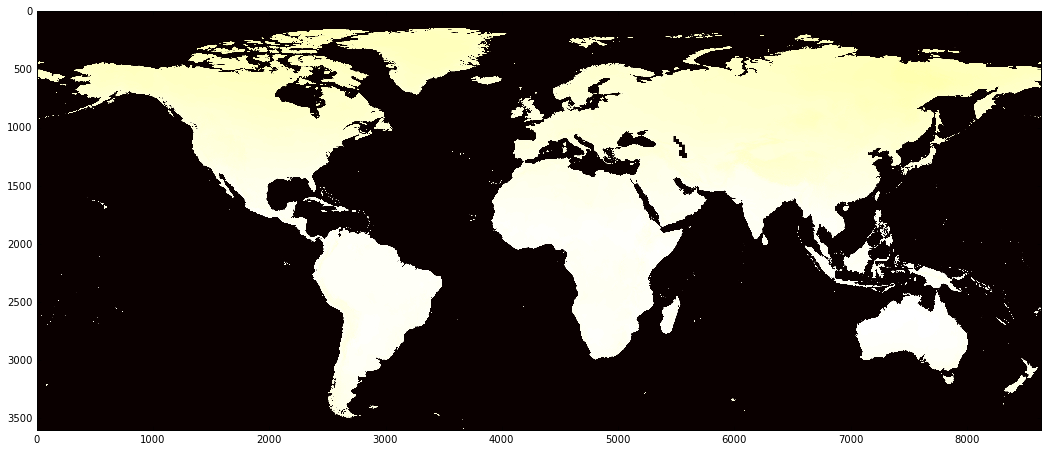

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 15))

ax.imshow(dataset.read(1), cmap="hot")

In [66]:
dataset.read(1)

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ..., 
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

In [78]:
my_data = dataset.read(1)

In [88]:
my_data[my_data>dataset.get_nodatavals()[0]]

array([-240, -240, -240, ...,  177,  161,  177], dtype=int16)

In [83]:
my_data.shape

(3600, 8640)

In [87]:
dataset.get_nodatavals()[0]

-9999.0

In [92]:
my_data[2000,5000]/10

34.299999999999997

In [95]:
from rasterio.transform import Affine
def transform_from_corner(ulx, uly, dx, dy):
    return Affine.translation(ulx, uly)*Affine.scale(dx, -dy)

print(transform_from_corner(bounds[0], bounds[3], 1.0/3600, 1.0/3600).to_gdal())

(119.52, 0.0002777777777777778, 0.0, -20.5, 0.0, -0.0002777777777777778)


In [96]:
from rasterio.features import rasterize
from shapely.geometry import Polygon, mapping

# image transform
bounds = (119.52, -21.6, 120.90, -20.5)
transform = transform_from_corner(bounds[0], bounds[3], 1.0/3600, 1.0/3600)

# Make raster image, burn in vector data which lies completely inside the bounding box
poly = Polygon(((120, -21), (120.5, -21), (120.5, -21.2), (120, -21.2)))
output = rasterize([poly], transform=transform, out_shape=(3961, 4969))
print(output)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


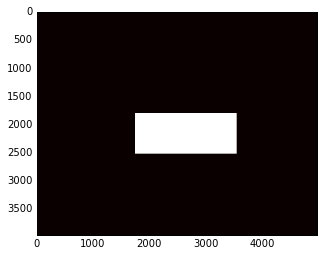

In [126]:
plt.imshow(output, cmap="hot")

In [125]:
import rasterio
from rasterio.features import rasterize
from rasterio.transform import IDENTITY
geometry = {
    'type': 'Polygon',
    'coordinates': [[(2, 2), (2, 4.25), (4.25, 4.25), (4.25, 2), (2, 2)]]}

geometry = Polygon([(2, 2), (2, 4.25), (4.25, 4.25), (4.25, 2), (2, 2)]).buffer(3)
rows = cols = 100

with rasterio.drivers():
    result = rasterize([geometry], out_shape=(rows, cols))
    with rasterio.open(
            "test.tif",
            'w',
            driver='GTiff',
            width=cols,
            height=rows,
            count=1,
            dtype=np.uint8,
            nodata=0,
            crs={'init': "EPSG:4326"}) as out:
        out.write(result.astype(np.uint8), indexes=1)

out.close()
result = None
out = None

/home/daniela/anaconda/envs/biodiversity/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


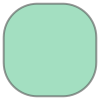

In [121]:
Polygon([(2, 2), (2, 4.25), (4.25, 4.25), (4.25, 2), (2, 2)]).buffer(3)